In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', sep=',')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Visualize the Data: Use matplotlib to visualize different aspects of the data. 

Create a pie chart to show the ratio of male to female passengers.

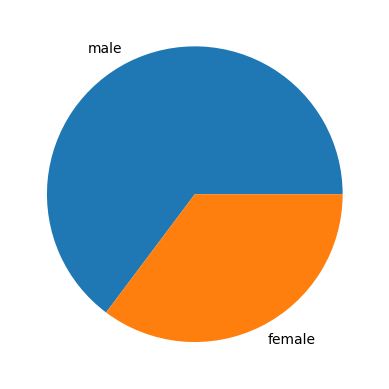

In [7]:
fig, axes = plt.subplots()
axes.pie(titanic['Sex'].value_counts(), labels =  titanic['Sex'].value_counts().index)
         
plt.show()

Create a histogram to show the distribution of passenger ages.

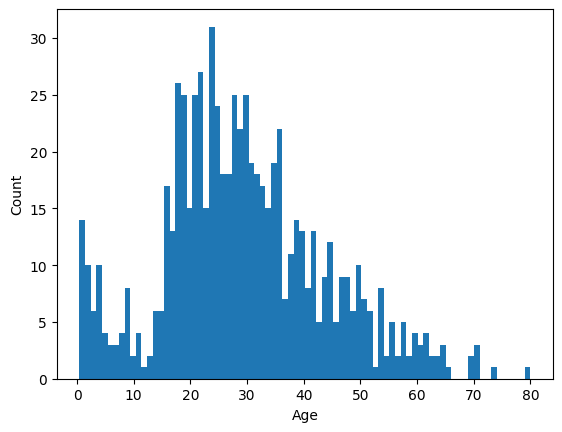

In [8]:
fig, axis = plt.subplots()
axis.set( xlabel='Age', ylabel='Count')
plt.hist(titanic['Age'], bins = 80)
plt.show()

Create a bar plot to show the number of passengers who survived and didn’t survive.

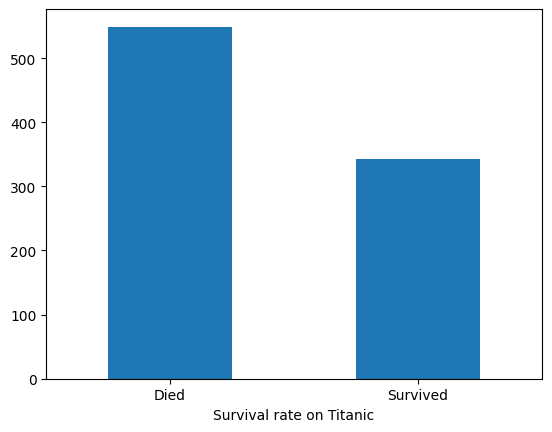

In [9]:
fig, axis = plt.subplots()
survivals = pd.Series(titanic['Survived'].value_counts())
survivals.plot.bar()
axis.set_xlabel('Survival rate on Titanic')
plt.xticks(rotation=0)
x_labels = [
    'Died',
    'Survived',
]
axis.set_xticklabels(x_labels)
plt.show()

Create a stacked bar plot to show the number of passengers who survived and didn’t survive, split by gender.

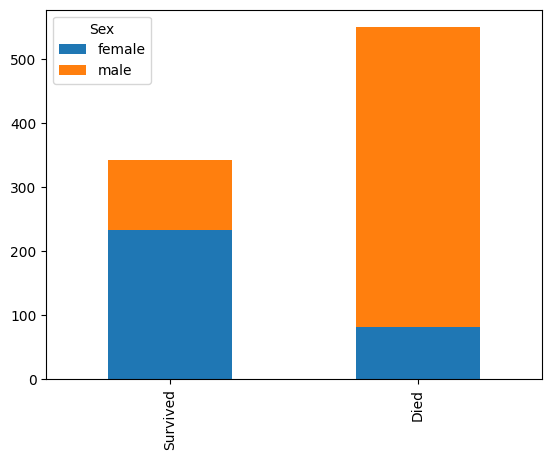

In [12]:
survived = titanic[titanic['Survived']==1]['Sex'].value_counts()
died = titanic[titanic['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived, died])
df.index = ('Survived','Died')
df.plot(kind='bar', stacked=True)
plt.show()

Create a scatter plot to show the correlation between fare and age.

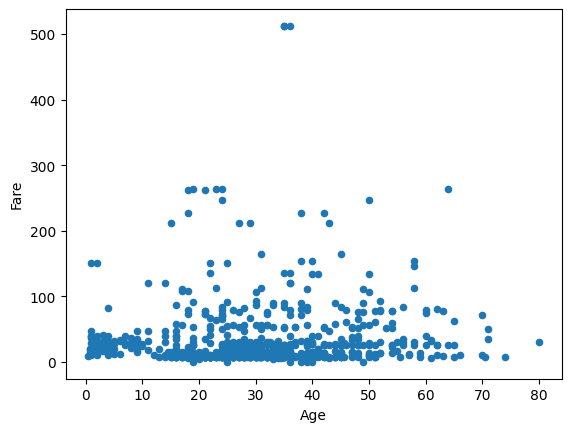

In [15]:
fig, axes = plt.subplots()

titanic.plot(kind='scatter', x='Age',y='Fare', ax=axes)
plt.show()

#### Preprocess the Data: Clean and preprocess the data:

Handle missing values in the ‘Age’ column by replacing them with the mean or median age.

In [18]:
titanic[['Age']] = titanic[['Age']].fillna(value=titanic['Age'].mean(skipna=True))
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


Normalize the ‘Fare’ column using a suitable method.

In [19]:
titanic['Fare'] = (titanic['Fare'] - titanic['Fare'].min()) / (titanic['Fare'].max() - titanic['Fare'].min())    
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,0.014151,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,0.015713,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,0.025374,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,0.058556,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,0.045771,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,0.058556,C148,C


Convert the ‘Sex’ column into numerical representation using one-hot encoding.

In [26]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
sex_encoder = encoder.fit_transform(titanic[['Sex']])
sex_encoder_df = pd.DataFrame(sex_encoder, columns=['Male'])
titanic = pd.concat([titanic, sex_encoder_df], axis=1)
titanic.drop(columns=['Sex'], inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,0.014151,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,0.139136,C85,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,0.015469,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,0.103644,C123,S,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,0.015713,NaN,S,1.0


#### Data Analysis: Use pandas and numpy to analyze the data. Here are some specific tasks:

Calculate the survival rate for different genders.

In [28]:
sex_survival_rate = titanic.groupby('Male')['Survived'].mean() * 100
sex_survival_rate

Male
0.0    74.203822
1.0    18.890815
Name: Survived, dtype: float64

Calculate the survival rate for different passenger classes.

In [29]:
class_survival_rate = titanic.groupby('Pclass')['Survived'].mean() * 100
class_survival_rate

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Identify the passenger with the highest fare.

In [32]:
passenger_highest_fare = titanic[titanic['Fare'] == titanic['Fare'].max()]
passenger_highest_fare

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male
258,259,1,1,"Ward, Miss. Anna",35.0,0,0,PC 17755,1.0,NaN,C,0.0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",36.0,0,1,PC 17755,1.0,B51 B53 B55,C,1.0
737,738,1,1,"Lesurer, Mr. Gustave J",35.0,0,0,PC 17755,1.0,B101,C,1.0
